## Applying Inferential Statistics Techniques to Monarch Reflectance Data

In this analysis, we explore statistical testing, summarizations, and characteristics of Monarch Butterfly reflectance characteristics across a broad spectrum of wavelengths. First, we begin by exploring some descriptive statistics relating to the reflectance features.

-----

In [46]:
import pandas as pd
reflectance = pd.read_csv('../../data/input/reflectances_cleaned.csv')
reflectance.sample(5)

,Sex,338.9,340.4,341.9,343.5,345,346.5,348,349.5,351,...,2498.2,2500.3,2502.4,2504.6,2506.7,2508.9,2511,2513.1,2515.3,2517.4
81,F,7.626667,8.193333,7.796667,7.563333,6.883333,6.506667,6.0900,5.786667,5.613333,...,20.913333,20.890000,20.900000,20.903333,20.896667,20.906667,20.903333,20.926667,20.913333,20.883333
76,F,9.180000,8.610000,8.200000,7.946667,7.246667,7.076667,6.7300,6.276667,5.800000,...,22.583333,22.553333,22.600000,22.610000,22.576667,22.583333,22.593333,22.590000,22.543333,22.586667
1,F,7.160000,6.977500,6.850000,6.595000,6.420000,6.050000,5.6750,5.125000,4.845000,...,18.572500,18.545000,18.492500,18.447500,18.457500,18.457500,18.437500,18.410000,18.400000,18.430000
12,M,9.446667,9.293333,9.116667,8.336667,8.103333,7.673333,7.0300,6.850000,6.630000,...,22.346667,22.320000,22.316667,22.303333,22.286667,22.313333,22.303333,22.290000,22.256667,22.283333
7,F,6.550000,6.360000,6.182500,5.907500,5.597500,5.800000,5.4025,5.052500,4.807500,...,12.785000,12.752500,12.727500,12.712500,12.702500,12.692500,12.692500,12.695000,12.692500,12.712500


In [47]:
import numpy as np

#start by computing mean for each column
mean_reflectances = reflectance.mean()

# features with lowest reflectance on average
max_mean = reflectance.mean().idxmax()
min_mean = reflectance.mean().idxmin()
print('The wavelength reflecting the most light on average is', max_mean,
      'nm at', round(reflectance.mean()[max_mean], 2), '% reflectance')

print('The wavelength reflecting the least light on average is', min_mean,
      'nm at', round(reflectance.mean()[min_mean], 2), '% reflectance\n')

#calculate and print columns at max and min standard deviation
max_std = reflectance.std().idxmax()
min_std = reflectance.std().idxmin()

print('The wavelength with the highest standard deviation is', max_std,
      'nm at', round(reflectance.std()[max_std], 3))

print('The wavelength with the lowest standard deviation is', min_std, 'nm at',
      round(reflectance.std()[min_std], 3))

The wavelength reflecting the most light on average is 1333.3 nm at 28.11 % reflectance
The wavelength reflecting the least light on average is 437.7 nm at 2.06 % reflectance

The wavelength with the highest standard deviation is 1950.3 nm at 5.01
The wavelength with the lowest standard deviation is 394.2 nm at 0.477


-----
The feature with the lowest mean reflectance, 437.7nm resides in the ultraviolet portion of the spectrum. Interestingly, the feature with the highest mean reflectance, 1333.3nm is far outside the visible spectrum in the near-infrared (NIR) spectrum of light.

----
### Visualizing the Curve
To better understand all of these features, we can plot the reflectance over the columns, as the columns are ordered in increasing wavelengths of light (in nm). This is commonly referred to as a "reflectance curve." Over top of the measurements, we can plot the mean value for each column in a separate color to get an approximation of the entire dataset.

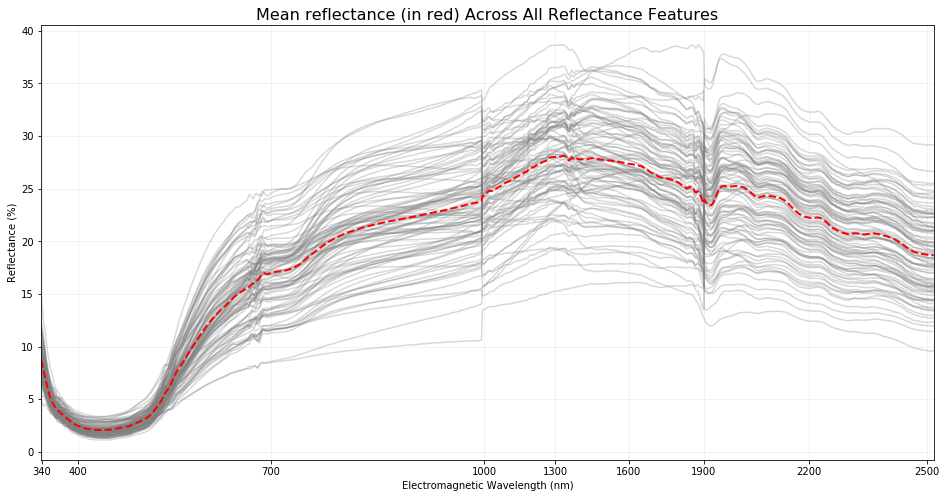

In [48]:
import matplotlib.pyplot as plt

mean_curve = reflectance.mean()

#plot all data in greyed out colorscheme
plt.figure(figsize=[16, 8])

for i in range(len(reflectance)):
    reflectance.iloc[i, 1:].plot(kind='line', alpha=0.3, color='gray')

#plot mean value curve in contrasting style and color
mean_curve.plot(kind='line', linewidth=2, color='Red', linestyle='--')

plt.xlabel('Electromagnetic Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.title('Mean reflectance (in red) Across All Reflectance Features',
          fontsize=16)
plt.xticks(
    [1, 41, 256, 493, 572, 654, 737, 854, 985],
    ['340', '400', '700', '1000', '1300', '1600', '1900', '2200', '2500'])
plt.grid(alpha=0.2)

Now a better picture of reflectance becomes clear. Reflectance in the visible portion (400-700) is more similar than reflectance out into the near infra-red or the shortwave infrared portions of the spectrum. There are also some very sharp increases or decreases which show up as nearly vertical lines. Perhaps visualizing this colored by sex class label may point out portions of the spectrum that tend to separate out

-----

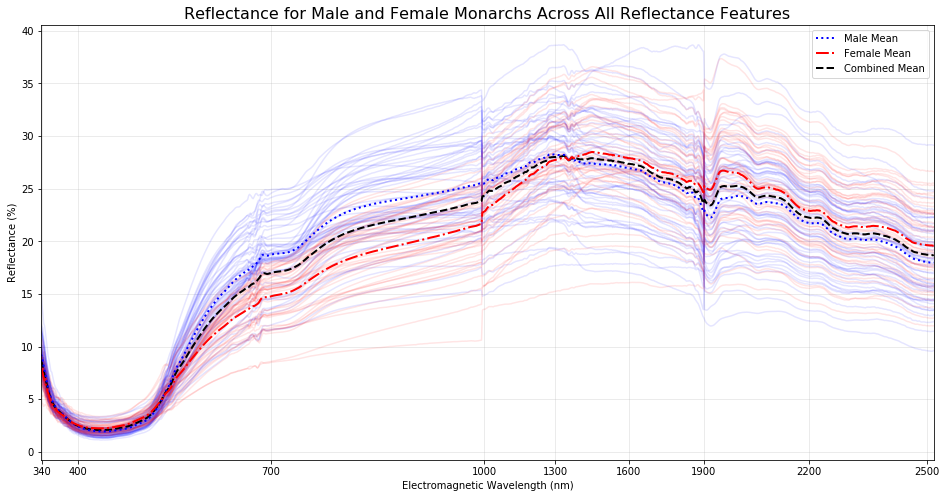

In [49]:
import matplotlib.pyplot as plt

#create dataframes for male vs female records
males = reflectance[reflectance.Sex == 'M']
females = reflectance[reflectance.Sex == 'F']
mean_curve_all = reflectance.mean()
mean_curve_m = males.mean()
mean_curve_f = females.mean()

#plot all data in greyed out colorscheme
plt.figure(figsize=[16, 8])

for i in range(len(males)):
    males.iloc[i, 1:].plot(kind='line', alpha=0.1, color='blue')

for i in range(len(females)):
    females.iloc[i, 1:].plot(kind='line', alpha=0.1, color='red')

#plot mean value curve in contrasting style and color
mean_curve_all.plot(kind='line', linewidth=2, color='k', linestyle='--')
mean_curve_m.plot(kind='line', linewidth=2, color='blue', linestyle=':')
mean_curve_f.plot(kind='line', linewidth=2, color='red', linestyle='-.')

#set plot labels
plt.xlabel('Electromagnetic Wavelength (nm)')
plt.ylabel('Reflectance (%)')
plt.title(
    'Reflectance for Male and Female Monarchs Across All Reflectance Features',
    fontsize=16)

#create legend without including full dataset
from matplotlib.lines import Line2D
legend_lines = [
    Line2D([0], [0], color='blue', linestyle=':', linewidth=2),
    Line2D([0], [0], color='red', linestyle='-.', linewidth=2),
    Line2D([0], [0], color='k', linestyle='--', linewidth=2)
]
plt.legend(legend_lines, ['Male Mean', 'Female Mean', 'Combined Mean'])
plt.xticks(
    [1, 41, 256, 493, 572, 654, 737, 854, 985],
    ['340', '400', '700', '1000', '1300', '1600', '1900', '2200', '2500'])
plt.grid(alpha=0.3)

Monarch researchers may see this and at first think "How can male Monarchs have higher reflectance in the orange/yellow/red colors (585-700nm) when it's well studied that female individuals tend to be darker red and orange?" Reflectance works in somewhat of the opposite of intuition in that regard. A 100% reflective surface would appear pure white, as all wavelengths are reflected back at equal and high levels. A purely black surface would absorb all light and reflect none. Females, with the typically darker coloration, reflect less light in these wavelengths and human eyes perceive this as a darker hue of the same color.

The means seem to separate around the red wavelengths and then stay separated up until ~1300nm. Female samples tend to increase right in that 1000-1400nm range at a rate higher than males. We can check if this separation is significant or not with some statistical testing.

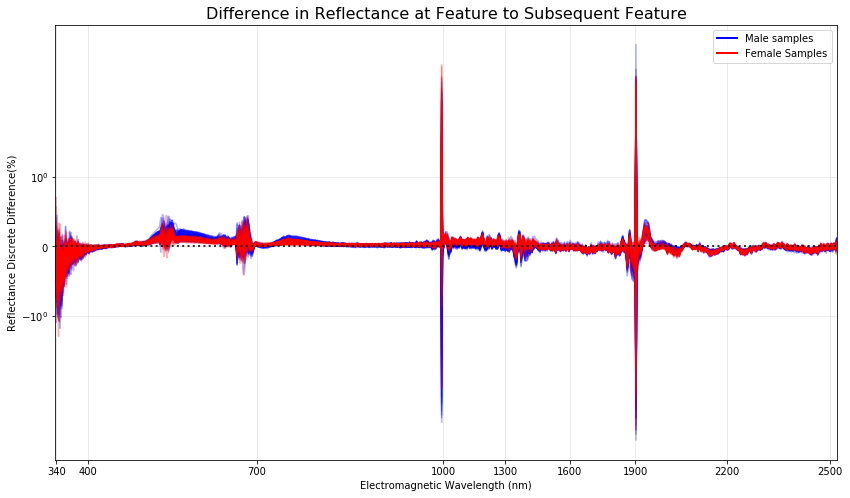

In [50]:
#create df with differences from wavelength to next(longer wavelength) column across each sample
males_diff = reflectance[reflectance.Sex == 'M'].diff(axis=1, periods=1)
females_diff = reflectance[reflectance.Sex == 'F'].diff(axis=1, periods=1)

#plot all data in greyed out colorscheme
plt.figure(figsize=[14, 8])

for i in range(len(males_diff)):
    males_diff.iloc[i, 1:].plot(kind='line', alpha=0.3, color='blue')
    
for i in range(len(females_diff)):
    females_diff.iloc[i, 1:].plot(kind='line', alpha=0.3, color='red')                              
                                

#plot mean value curve in contrasting style and color
# mean_curve.plot(kind='line', linewidth=2, color='red', linestyle='--')

plt.xlabel('Electromagnetic Wavelength (nm)')
plt.ylabel('Reflectance Discrete Difference(%)')
plt.title('Difference in Reflectance at Feature to Subsequent Feature',
          fontsize=16)
plt.axhline(y=0, alpha=0.8, color='k', linestyle=':', linewidth=2)
plt.xticks(
    [1, 41, 256, 493, 572, 654, 737, 854, 985],
    ['340', '400', '700', '1000', '1300', '1600', '1900', '2200', '2500'])
plt.grid(alpha=0.3)
plt.yscale('linear')

legend_lines = [
    Line2D([0], [0], color='blue', linestyle='-', linewidth=2),
    Line2D([0], [0], color='red', linestyle='-', linewidth=2),

]
plt.legend(legend_lines, ['Male samples', 'Female Samples'])

# for slightly better visibility on values close to 0
plt.yscale('symlog')

This plot shows two very clear features where the difference in reflectances between the prior and the subsequent wavelength increase rapidly compared to the increases in other areas:
    * 1902nm
    * 992.6nm
    
Most curiously, the differences tend to spike in both the positive (the next feature reflected less light than that feature) and negative (the next feature reflected more light than that feature) directions. This occurred in what looks like almost equal magnitudes in both directions for those features. However, the 992.6nm feature seems to spike negatively more for males than for females. Other noisy feature ranges dont always follow that trend. For example, 
There seem to be several smaller "noisy" areas where the differences in feature reflectance changes less consistently than in others as well. 


### Checking for normality

----
Before testing some hypotheses, it's helpful to know if the distribution of features can be considered normal. With such a wide dataset, it's not quite as easy as checking one or two features. Let's loop through each of them and check them all.

------------
        Column Not_Normal     p-value     Normality
count      994        994  994.000000           994
unique     994          2         NaN             2
top     2234.1      False         NaN  Maybe Normal
freq         1        977         NaN           977
mean       NaN        NaN    0.628360           NaN
std        NaN        NaN    0.303624           NaN
min        NaN        NaN    0.000079           NaN
25%        NaN        NaN    0.404076           NaN
50%        NaN        NaN    0.754522           NaN
75%        NaN        NaN    0.870301           NaN
max        NaN        NaN    0.996216           NaN
------------


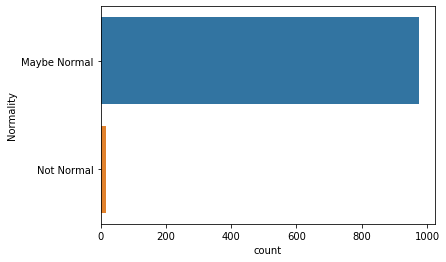

Maybe Normal    977
Not Normal       17
Name: Normality, dtype: int64

In [51]:
import scipy
from scipy import stats
import seaborn as sns
import sys

#set alpha level for testing, 0.01 here
alpha = 0.01

df_list = list()

# normality code taken from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
cat_map = {True: 'Not Normal', False: 'Maybe Normal'}
for col in reflectance.iloc[:, 1:].columns:
    k2, p = stats.normaltest(reflectance[col])
    is_not_normal = p < alpha
    tmp_df = pd.DataFrame({
        'Column': [col],
        'Not_Normal': [is_not_normal],
        'p-value': [p],
        'Normality': cat_map[is_not_normal]
    })
    df_list.append(tmp_df)

df_results = pd.concat(df_list)
df_results['Normality'] = df_results['Normality'].astype('category')

print('------------')
print(df_results.describe(include='all'))
print('------------')

sns.countplot(data=df_results, y='Normality')

plt.show()
df_results['Normality'].value_counts()

### Statistical Testing

-----


First, let's see if the mean values in the blues, greens, and reds differ among male and female monarchs. Instead of choosing a random feature in those color spaces, we will just take the mean of the commonly used reflectance ranges for testing these colors

In [52]:
#separate into dataframes by color
df_blues = pd.DataFrame({'sex' : reflectance['Sex'], 'mean_r': reflectance.loc[:,'450.6':'510.1'].mean(axis=1)})
df_greens =  pd.DataFrame({'sex' : reflectance['Sex'], 'mean_r': reflectance.loc[:,'531.2':'591'].mean(axis=1)})
df_reds =  pd.DataFrame({'sex' : reflectance['Sex'], 'mean_r': reflectance.loc[:,'640.4':'690.6'].mean(axis=1)})

In [53]:
from scipy.stats import ttest_ind

#set thresholds
alpha5 = 0.05
alpha1 = 0.01

#blues testing
print(
    'Testing H0: Blue reflectance is differrent among male and female Monarch Butterflies'
)

#set data for testing
df_f = df_blues[df_blues.sex == 'F']['mean_r']
df_m = df_blues[df_blues.sex == 'M']['mean_r']

#run test and print results
t, p = ttest_ind(df_m, df_f)
print('Test Statistic:', t)
if p > alpha5:
    print(
        'The null hypothesis cannot be rejected an alpha of {}, p={}.'.format(
            alpha5, p))
elif p < alpha1:
    print(
        'There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha {}. p = {}.'
        .format(alpha1, p))
else:
    print(
        'There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha {}, p = {}.'
        .format(alpha5, p))

Testing H0: Blue reflectance is differrent among male and female Monarch Butterflies
Test Statistic: -3.526611609948076
There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha 0.01. p = 0.0006528262205843673.


In [54]:
#greens testing
print(
    'Testing H0: Green reflectance is differrent among male and female Monarch Butterflies'
)

#set data for testing
df_f = df_greens[df_greens.sex == 'F']['mean_r']
df_m = df_greens[df_greens.sex == 'M']['mean_r']

#run test and print results
t, p = ttest_ind(df_m, df_f)
print('Test Statistic:', t)

if p > alpha5:
    print(
        'The null hypothesis cannot be rejected an alpha of {}, p={}.'.format(
            alpha5, p))
elif p < alpha1:
    print(
        'There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha {}. p = {}.'
        .format(alpha1, p))
else:
    print(
        'There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha {}, p = {}.'
        .format(alpha5, p))

Testing H0: Green reflectance is differrent among male and female Monarch Butterflies
Test Statistic: 3.5479445670759797
There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha 0.01. p = 0.0006079527418461603.


In [55]:
#Reds testing
print(
    'Testing H0: Red wavelengths reflectance is differrent among male and female Monarch Butterflies'
)

#set data for testing
df_f = df_reds[df_reds.sex == 'F']['mean_r']
df_m = df_reds[df_reds.sex == 'M']['mean_r']

#run test and print results
t, p = ttest_ind(df_m, df_f)
print('Test Statistic:', t)
if p > alpha5:
    print(
        'The null hypothesis cannot be rejected an alpha of {}, p={}.'.format(
            alpha5, p))
elif p < alpha1:
    print(
        'There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha {}. p = {}.'
        .format(alpha1, p))
else:
    print(
        'There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha {}, p = {}.'
        .format(alpha5, p))

Testing H0: Red wavelengths reflectance is differrent among male and female Monarch Butterflies
Test Statistic: 6.417852055535386
There is evidence to support the alternative hypothesis. The null hypothesis can be rejected at alpha 0.01. p = 5.563008646357821e-09.


----

**Among red and green wavelengths, reflectance is significantly higher in male Monarchs than in female Monarchs.**

**In blue wavelengths, reflectance is signficantly lower in male Monarchs compared to female Monarchs.**

**Most of the features in this dataset could be considered normal upon inspection. Some may need transformation or non-parametric tests if further testing is pursued using those features**